In [1]:
import pandas as pd
from string import ascii_uppercase as alphabet 

import pickle 

!pip install lxml
!pip install bs4

from bs4 import BeautifulSoup
!pip install requests

import requests

from scipy.stats import poisson

In [2]:
try:
    israel_matches = pd.read_csv('/datasets/israel_matches.csv')
    
except:
    israel_matches = pd.read_csv('C:/Users/Admin/Desktop/practicum/israel_matches.csv')
israel_matches.head()

,home,score,away,years
0,Austria,5–2,Israel,1994
1,Israel,1–3,Sweden,1994
2,Israel,0–2,Bulgaria,1994
3,Israel,0–4,France,1994
4,Bulgaria,2–2,Israel,1994


In [3]:
israel_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   home    164 non-null    object
 1   score   164 non-null    object
 2   away    164 non-null    object
 3   years   164 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.2+ KB


In [4]:
israel_matches['away'].unique()

array(['\xa0Israel', '\xa0Sweden', '\xa0Bulgaria', '\xa0France',
       '\xa0Austria', '\xa0Finland', '\xa0Russia', '\xa0Luxembourg',
       '\xa0Cyprus', '\xa0Liechtenstein', '\xa0Bosnia and Herzegovina',
       '\xa0Spain', '\xa0\xa0Switzerland', '\xa0Republic of Ireland',
       '\xa0Faroe Islands', '\xa0Greece', '\xa0Latvia', '\xa0Moldova',
       '\xa0Portugal', '\xa0Azerbaijan', '\xa0Northern Ireland',
       '\xa0Italy', '\xa0Albania', '\xa0Macedonia', '\xa0Denmark',
       '\xa0Scotland', '\xa0San Marino', '\xa0Poland', '\xa0Slovakia',
       '\xa0Romania', '\xa0Slovenia', '\xa0Malta', '\xa0Andorra',
       '\xa0Croatia', '\xa0England', '\xa0Estonia', '\xa0Georgia',
       '\xa0Wales', '\xa0Belgium', '\xa0North Macedonia', '\xa0Kosovo',
       '\xa0Belarus', '\xa0Czech Republic'], dtype=object)

### We need to transform the values in the 'away' and 'home' columns so that only the country name remains

In [41]:

# We remove leading and trailing spaces in the 'home' column.
israel_matches['home'] = israel_matches['home'].str.strip()

# We remove leading and trailing spaces in the 'away' column.
israel_matches['away'] = israel_matches['away'].str.strip()


israel_matches.head()

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222


In [42]:

israel_matches['away'].unique()

array(['Israel', 'Sweden', 'Bulgaria', 'France', 'Austria', 'Finland',
       'Russia', 'Luxembourg', 'Cyprus', 'Liechtenstein',
       'Bosnia and Herzegovina', 'Spain', 'Switzerland',
       'Republic of Ireland', 'Faroe Islands', 'Greece', 'Latvia',
       'Moldova', 'Portugal', 'Azerbaijan', 'Northern Ireland', 'Italy',
       'Albania', 'Macedonia', 'Denmark', 'Scotland', 'San Marino',
       'Poland', 'Slovakia', 'Romania', 'Slovenia', 'Malta', 'Andorra',
       'Croatia', 'England', 'Estonia', 'Georgia', 'Wales', 'Belgium',
       'North Macedonia', 'Kosovo', 'Belarus', 'Czech Republic'],
      dtype=object)

In [43]:
israel_matches['home'].unique()

array(['Austria', 'Israel', 'Bulgaria', 'Sweden', 'Finland', 'France',
       'Cyprus', 'Luxembourg', 'Russia', 'Spain', 'Liechtenstein',
       'Bosnia and Herzegovina', 'Republic of Ireland', 'Switzerland',
       'Faroe Islands', 'Moldova', 'Latvia', 'Greece', 'Azerbaijan',
       'Northern Ireland', 'Portugal', 'Macedonia', 'Albania', 'Italy',
       'Denmark', 'Scotland', 'San Marino', 'Poland', 'Romania',
       'Slovakia', 'Malta', 'Slovenia', 'Estonia', 'Andorra', 'England',
       'Croatia', 'Georgia', 'Wales', 'Belgium', 'North Macedonia',
       'Belarus', 'Kosovo', 'Czech Republic'], dtype=object)

### substitute the names of the coaches.

In [44]:
def get_coach(year):
    if year in [1994, 1996, 1998, 2000]:
        return 'Shlomo Sharf'
    elif year == 2002:
        return 'Rikhard Nilsen'
    elif year in [2004, 2006]:
        return 'Avraham Grant'
    elif year in [2008, 2010]:
        return 'Dror Kashtan'
    elif year == 2012:
        return 'Luis Fernandes'
    elif year == 2014:
        return 'Eli Gutman'
    elif year in [2016, 2018]:
        return 'Elisha Levy'
    elif year in [2019, 2020]:
        return 'Andy Herzog'
    elif year in [2021, 2022]:
        return 'Wely Rotenshtern'
    else:
        return 'Alon Khazan' 
# We apply a function to the 'years' column and create a new column named 'Coach'
israel_matches['coach'] = israel_matches['years'].apply(get_coach)

israel_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Israel,1–1,Slovakia,2021,Wely Rotenshtern,1,1,h,1,1,30,28,2,1,1.500000
160,Israel,1–2,Czech Republic,2021,Wely Rotenshtern,1,2,h,1,2,30,28,2,0,1.500000
161,Slovakia,2–3,Israel,2021,Wely Rotenshtern,2,3,a,3,2,30,28,2,3,1.500000
162,Czech Republic,1–0,Israel,2021,Wely Rotenshtern,1,0,a,0,1,30,28,2,0,1.500000


In [45]:
alon_khazan_rows = israel_matches[israel_matches['coach'] == 'Alon Khazan']
alon_khazan_rows

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
144,Israel,1–1,Kosovo,2024,Alon Khazan,1,1,h,1,1,11,11,0,1,1.5
145,Switzerland,3–0,Israel,2024,Alon Khazan,3,0,a,0,3,11,11,0,0,1.5
146,Belarus,1–2,Israel,2024,Alon Khazan,1,2,a,2,1,11,11,0,3,1.5
147,Israel,2–1,Andorra,2024,Alon Khazan,2,1,h,2,1,11,11,0,3,1.5
148,Romania,1–1,Israel,2024,Alon Khazan,1,1,a,1,1,11,11,0,1,1.5
149,Israel,1–0,Belarus,2024,Alon Khazan,1,0,h,1,0,11,11,0,3,1.5
150,Kosovo,1–0,Israel,2024,Alon Khazan,1,0,a,0,1,11,11,0,0,1.5
151,Israel,1–1,Switzerland,2024,Alon Khazan,1,1,h,1,1,11,11,0,1,1.5
152,Israel,1–2,Romania,2024,Alon Khazan,1,2,h,1,2,11,11,0,0,1.5
153,Andorra,0–2,Israel,2024,Alon Khazan,0,2,a,2,0,11,11,0,3,1.5


In [46]:
Andy_Herzog = israel_matches[israel_matches['coach'] == 'Andy Herzog']
Andy_Herzog

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
134,Israel,1–1,Slovenia,2020,Andy Herzog,1,1,h,1,1,22,23,-1,1,1.214286
135,Israel,4–2,Austria,2020,Andy Herzog,4,2,h,4,2,22,23,-1,3,1.214286
136,Latvia,0–3,Israel,2020,Andy Herzog,0,3,a,3,0,22,23,-1,3,1.214286
137,Poland,4–0,Israel,2020,Andy Herzog,4,0,a,0,4,22,23,-1,0,1.214286
138,Israel,1–1,North Macedonia,2020,Andy Herzog,1,1,h,1,1,22,23,-1,1,1.214286
139,Slovenia,3–2,Israel,2020,Andy Herzog,3,2,a,2,3,22,23,-1,0,1.214286
140,Austria,3–1,Israel,2020,Andy Herzog,3,1,a,1,3,22,23,-1,0,1.214286
141,Israel,3–1,Latvia,2020,Andy Herzog,3,1,h,3,1,22,23,-1,3,1.214286
142,Israel,1–2,Poland,2020,Andy Herzog,1,2,h,1,2,22,23,-1,0,1.214286
143,North Macedonia,1–0,Israel,2020,Andy Herzog,1,0,a,0,1,22,23,-1,0,1.214286


In [47]:
israel_matches['home_goals'] = israel_matches['score'].apply(lambda x: int(x.split('–')[0]))
israel_matches['away_goals'] = israel_matches['score'].apply(lambda x: int(x.split('–')[1]))
israel_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Israel,1–1,Slovakia,2021,Wely Rotenshtern,1,1,h,1,1,30,28,2,1,1.500000
160,Israel,1–2,Czech Republic,2021,Wely Rotenshtern,1,2,h,1,2,30,28,2,0,1.500000
161,Slovakia,2–3,Israel,2021,Wely Rotenshtern,2,3,a,3,2,30,28,2,3,1.500000
162,Czech Republic,1–0,Israel,2021,Wely Rotenshtern,1,0,a,0,1,30,28,2,0,1.500000


In [48]:
israel_matches['israel_home'] = israel_matches.apply(lambda row: 'h' if 'Israel' in row['home'] else 'a', axis=1)


israel_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Israel,1–1,Slovakia,2021,Wely Rotenshtern,1,1,h,1,1,30,28,2,1,1.500000
160,Israel,1–2,Czech Republic,2021,Wely Rotenshtern,1,2,h,1,2,30,28,2,0,1.500000
161,Slovakia,2–3,Israel,2021,Wely Rotenshtern,2,3,a,3,2,30,28,2,3,1.500000
162,Czech Republic,1–0,Israel,2021,Wely Rotenshtern,1,0,a,0,1,30,28,2,0,1.500000


### We create a column named 'is_goals' to represent the scored goals.

In [49]:

israel_matches['is_goals'] = israel_matches.apply(lambda row: row['home_goals'] if row['israel_home'] == 'h' else row['away_goals'], axis=1)
israel_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Israel,1–1,Slovakia,2021,Wely Rotenshtern,1,1,h,1,1,30,28,2,1,1.500000
160,Israel,1–2,Czech Republic,2021,Wely Rotenshtern,1,2,h,1,2,30,28,2,0,1.500000
161,Slovakia,2–3,Israel,2021,Wely Rotenshtern,2,3,a,3,2,30,28,2,3,1.500000
162,Czech Republic,1–0,Israel,2021,Wely Rotenshtern,1,0,a,0,1,30,28,2,0,1.500000


### We create a column named 'is_get_goals' to represent the conceded goals.

In [50]:
israel_matches['is_get_goals'] = israel_matches.apply(lambda row: row['home_goals'] if row['israel_home'] == 'a' else row['away_goals'], axis=1)
israel_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Israel,1–1,Slovakia,2021,Wely Rotenshtern,1,1,h,1,1,30,28,2,1,1.500000
160,Israel,1–2,Czech Republic,2021,Wely Rotenshtern,1,2,h,1,2,30,28,2,0,1.500000
161,Slovakia,2–3,Israel,2021,Wely Rotenshtern,2,3,a,3,2,30,28,2,3,1.500000
162,Czech Republic,1–0,Israel,2021,Wely Rotenshtern,1,0,a,0,1,30,28,2,0,1.500000


### We create a column named 'coach_goals' and fill it with the sum of goals for each coach.

In [51]:

israel_matches['coach_goals'] = israel_matches.groupby('coach')['is_goals'].transform('sum')


israel_matches.head(28)

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
5,Sweden,5–0,Israel,1994,Shlomo Sharf,5,0,a,0,5,57,56,1,0,1.222222
6,Finland,0–0,Israel,1994,Shlomo Sharf,0,0,a,0,0,57,56,1,1,1.222222
7,France,2–3,Israel,1994,Shlomo Sharf,2,3,a,3,2,57,56,1,3,1.222222
8,Israel,1–1,Austria,1994,Shlomo Sharf,1,1,h,1,1,57,56,1,1,1.222222
9,Israel,1–3,Finland,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222


### We group the data by coaches, calculate the sum of goals and the number of matches. Then, we create a column named 'avg_goals_per_game' with the average number of goals per game.

In [56]:

coach_stats = israel_matches.groupby('coach').agg({'is_goals': 'sum', 'home': 'count'}).reset_index()


coach_stats['avg_goals_per_game'] = coach_stats['is_goals'] / coach_stats['home']


coach_stats[['coach', 'avg_goals_per_game']]

,coach,avg_goals_per_game
0,Alon Khazan,1.100000
1,Andy Herzog,1.571429
2,Avraham Grant,1.333333
3,Dror Kashtan,1.818182
4,Eli Gutman,1.900000
5,Elisha Levy,1.300000
6,Luis Fernandes,1.300000
7,Rikhard Nilsen,1.375000
8,Shlomo Sharf,1.583333
9,Wely Rotenshtern,1.875000


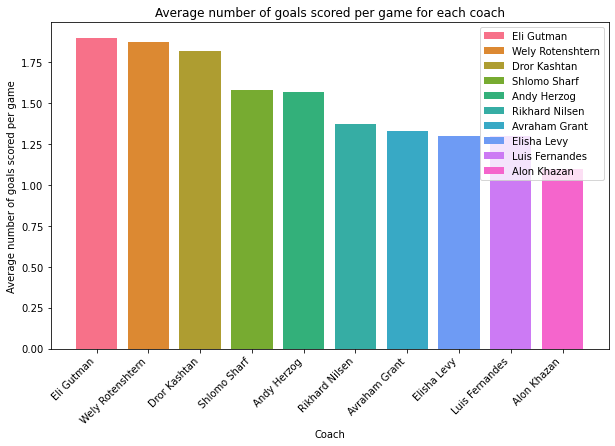

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# We create a color palette with a number of colors equal to the number of coaches.
color_palette = sns.color_palette("husl", n_colors=len(coach_stats))

# We sort the data by the average number of goals per game.
coach_stats_sorted = coach_stats.sort_values(by='avg_goals_per_game', ascending=False)

# create a bar chart.
plt.figure(figsize=(10, 6))
bars = plt.bar(coach_stats_sorted['coach'], coach_stats_sorted['avg_goals_per_game'], color=color_palette)

# add a legend.
plt.legend(bars, coach_stats_sorted['coach'])

plt.xlabel('Coach')
plt.ylabel('Average number of goals scored per game')
plt.title('Average number of goals scored per game for each coach')
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
# create a column 'coach_goals' and fill it with the sum of goals for each coach.
israel_matches['coach_get_goals'] = israel_matches.groupby('coach')['is_get_goals'].transform('sum')
# group the data by coaches and calculate the sum of goals and the number of matches.
coach_stats = israel_matches.groupby('coach').agg({'is_get_goals': 'sum', 'home': 'count'}).reset_index()

#  create a column 'avg_goals_per_game' with the average number of goals per game.
coach_stats['avg_get_goals_per_game'] = coach_stats['is_get_goals'] / coach_stats['home']


coach_stats[['coach', 'avg_get_goals_per_game']]

,coach,avg_get_goals_per_game
0,Alon Khazan,1.100000
1,Andy Herzog,1.642857
2,Avraham Grant,1.166667
3,Dror Kashtan,1.000000
4,Eli Gutman,1.400000
5,Elisha Levy,1.450000
6,Luis Fernandes,1.100000
7,Rikhard Nilsen,0.875000
8,Shlomo Sharf,1.555556
9,Wely Rotenshtern,1.750000


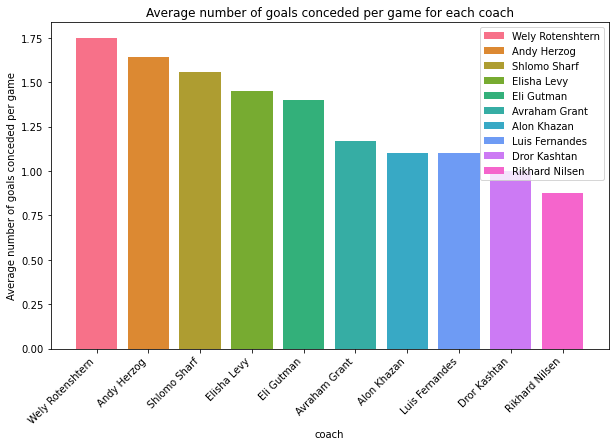

In [59]:

color_palette = sns.color_palette("husl", n_colors=len(coach_stats))


coach_stats_sorted = coach_stats.sort_values(by='avg_get_goals_per_game', ascending=False)


plt.figure(figsize=(10, 6))
bars = plt.bar(coach_stats_sorted['coach'], coach_stats_sorted['avg_get_goals_per_game'], color=color_palette)


plt.legend(bars, coach_stats_sorted['coach'])

plt.xlabel('coach')
plt.ylabel('Average number of goals conceded per game')
plt.title('Average number of goals conceded per game for each coach')
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
# We create a column 'coach_goals' and fill it with the sum of goals for each coach
israel_matches['coach_get_goals'] = israel_matches.groupby('coach')['is_get_goals'].transform('sum')


israel_matches.head(28)

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
5,Sweden,5–0,Israel,1994,Shlomo Sharf,5,0,a,0,5,57,56,1,0,1.222222
6,Finland,0–0,Israel,1994,Shlomo Sharf,0,0,a,0,0,57,56,1,1,1.222222
7,France,2–3,Israel,1994,Shlomo Sharf,2,3,a,3,2,57,56,1,3,1.222222
8,Israel,1–1,Austria,1994,Shlomo Sharf,1,1,h,1,1,57,56,1,1,1.222222
9,Israel,1–3,Finland,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222


### create a new column 'coach_sub_goals' that stores the difference between scored and conceded goals.

In [61]:

israel_matches['coach_sub_goals'] = israel_matches['coach_goals'] - israel_matches['coach_get_goals']


israel_matches.head(50)

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
5,Sweden,5–0,Israel,1994,Shlomo Sharf,5,0,a,0,5,57,56,1,0,1.222222
6,Finland,0–0,Israel,1994,Shlomo Sharf,0,0,a,0,0,57,56,1,1,1.222222
7,France,2–3,Israel,1994,Shlomo Sharf,2,3,a,3,2,57,56,1,3,1.222222
8,Israel,1–1,Austria,1994,Shlomo Sharf,1,1,h,1,1,57,56,1,1,1.222222
9,Israel,1–3,Finland,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222


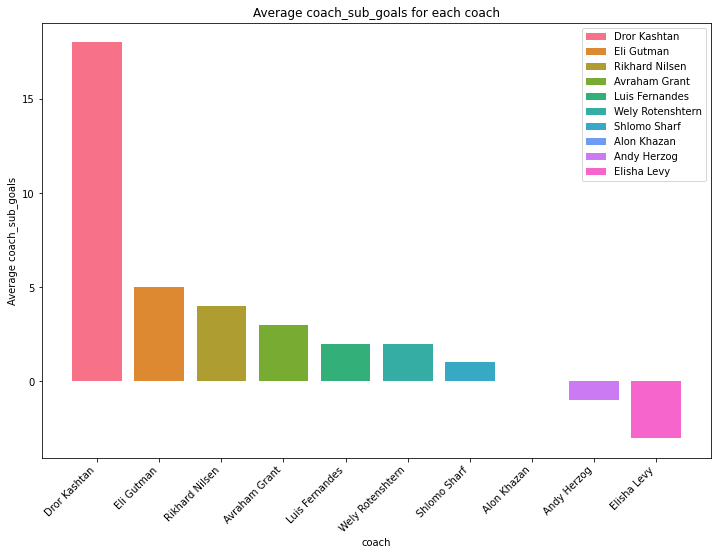

In [62]:
unique_coaches = israel_matches['coach'].unique()

color_palette = sns.color_palette("husl", n_colors=len(unique_coaches))

sorted_coaches = israel_matches.groupby('coach')['coach_sub_goals'].mean().sort_values(ascending=False).index


plt.figure(figsize=(12, 8))

for i, coach in enumerate(sorted_coaches):
    coach_data = israel_matches[israel_matches['coach'] == coach]
    plt.bar(coach, coach_data['coach_sub_goals'].mean(), color=color_palette[i], label=coach)


plt.xlabel('coach')
plt.ylabel('Average coach_sub_goals')
plt.title('Average coach_sub_goals for each coach')


plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')

plt.show()

In [63]:
# create the first table where 'Israel' appears only in the 'Home' column
israel_home_matches = israel_matches[israel_matches['home'] == 'Israel']

# We create the second table where 'Israel' appears only in the 'Away' column
israel_away_matches = israel_matches[israel_matches['away'] == 'Israel']


print("Table with 'Israel' in the 'Home' column:")
print(israel_home_matches.head())

print("Table with 'Israel' in the 'Away' column:")
print(israel_away_matches.head())

Table with 'Israel' in the 'Home' column:
     home score      away  years         coach  home_goals  away_goals  \
1  Israel   1–3    Sweden   1994  Shlomo Sharf           1           3   
2  Israel   0–2  Bulgaria   1994  Shlomo Sharf           0           2   
3  Israel   0–4    France   1994  Shlomo Sharf           0           4   
8  Israel   1–1   Austria   1994  Shlomo Sharf           1           1   
9  Israel   1–3   Finland   1994  Shlomo Sharf           1           3   

  israel_home  is_goals  is_get_goals  coach_goals  coach_get_goals  \
1           h         1             3           57               56   
2           h         0             2           57               56   
3           h         0             4           57               56   
8           h         1             1           57               56   
9           h         1             3           57               56   

   coach_sub_goals  is_points  coach_points  
1                1          0      1.222

In [64]:
israel_home_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
8,Israel,1–1,Austria,1994,Shlomo Sharf,1,1,h,1,1,57,56,1,1,1.222222
9,Israel,1–3,Finland,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Israel,2–1,Scotland,2019,Andy Herzog,2,1,h,2,1,22,23,-1,3,1.214286
156,Israel,2–0,Albania,2019,Andy Herzog,2,0,h,2,0,22,23,-1,3,1.214286
159,Israel,1–1,Slovakia,2021,Wely Rotenshtern,1,1,h,1,1,30,28,2,1,1.500000
160,Israel,1–2,Czech Republic,2021,Wely Rotenshtern,1,2,h,1,2,30,28,2,0,1.500000


In [65]:
israel_away_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
5,Sweden,5–0,Israel,1994,Shlomo Sharf,5,0,a,0,5,57,56,1,0,1.222222
6,Finland,0–0,Israel,1994,Shlomo Sharf,0,0,a,0,0,57,56,1,1,1.222222
7,France,2–3,Israel,1994,Shlomo Sharf,2,3,a,3,2,57,56,1,3,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Albania,1–0,Israel,2019,Andy Herzog,1,0,a,0,1,22,23,-1,0,1.214286
157,Scotland,3–2,Israel,2019,Andy Herzog,3,2,a,2,3,22,23,-1,0,1.214286
158,Scotland,1–1,Israel,2021,Wely Rotenshtern,1,1,a,1,1,30,28,2,1,1.500000
161,Slovakia,2–3,Israel,2021,Wely Rotenshtern,2,3,a,3,2,30,28,2,3,1.500000


In [68]:
# create a column named 'is_points'.
israel_matches['is_points'] = 0  # Initialize all values to zero

# determine the victory
israel_matches.loc[(israel_matches['home'] == 'Israel') & (israel_matches['home_goals'] > israel_matches['away_goals']), 'is_points'] = 3
israel_matches.loc[(israel_matches['away'] == 'Israel') & (israel_matches['home_goals'] < israel_matches['away_goals']), 'is_points'] = 3

# determine the draw.
israel_matches.loc[israel_matches['home_goals'] == israel_matches['away_goals'], 'is_points'] = 1


israel_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Israel,1–1,Slovakia,2021,Wely Rotenshtern,1,1,h,1,1,30,28,2,1,1.500000
160,Israel,1–2,Czech Republic,2021,Wely Rotenshtern,1,2,h,1,2,30,28,2,0,1.500000
161,Slovakia,2–3,Israel,2021,Wely Rotenshtern,2,3,a,3,2,30,28,2,3,1.500000
162,Czech Republic,1–0,Israel,2021,Wely Rotenshtern,1,0,a,0,1,30,28,2,0,1.500000


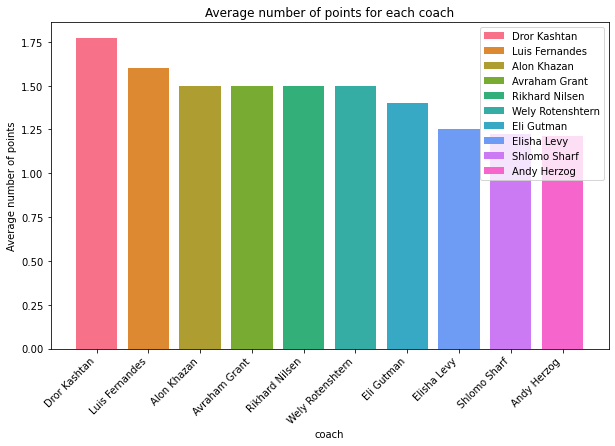

In [67]:
# 1. Calculate the average number of points for each coach and place it in a new column 'coach_points'
israel_matches['coach_points'] = israel_matches.groupby('coach')['is_points'].transform('mean')

# 2. Arrange the data in descending order of coaches based on the number of points.
coach_stats = israel_matches.groupby('coach')['coach_points'].mean().reset_index()
coach_stats_sorted = coach_stats.sort_values(by='coach_points', ascending=False)

# 3. Visualize the results as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(coach_stats_sorted['coach'], coach_stats_sorted['coach_points'], color=sns.color_palette("husl", n_colors=len(coach_stats)))


plt.legend(bars, coach_stats_sorted['coach'])

plt.xlabel('coach')
plt.ylabel('Average number of points')
plt.title('Average number of points for each coach')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
israel_matches

,home,score,away,years,coach,home_goals,away_goals,israel_home,is_goals,is_get_goals,coach_goals,coach_get_goals,coach_sub_goals,is_points,coach_points
0,Austria,5–2,Israel,1994,Shlomo Sharf,5,2,a,2,5,57,56,1,0,1.222222
1,Israel,1–3,Sweden,1994,Shlomo Sharf,1,3,h,1,3,57,56,1,0,1.222222
2,Israel,0–2,Bulgaria,1994,Shlomo Sharf,0,2,h,0,2,57,56,1,0,1.222222
3,Israel,0–4,France,1994,Shlomo Sharf,0,4,h,0,4,57,56,1,0,1.222222
4,Bulgaria,2–2,Israel,1994,Shlomo Sharf,2,2,a,2,2,57,56,1,1,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Israel,1–1,Slovakia,2021,Wely Rotenshtern,1,1,h,1,1,30,28,2,1,1.500000
160,Israel,1–2,Czech Republic,2021,Wely Rotenshtern,1,2,h,1,2,30,28,2,0,1.500000
161,Slovakia,2–3,Israel,2021,Wely Rotenshtern,2,3,a,3,2,30,28,2,3,1.500000
162,Czech Republic,1–0,Israel,2021,Wely Rotenshtern,1,0,a,0,1,30,28,2,0,1.500000


In [37]:
coach_stats

,coach,coach_points
0,Alon Khazan,1.500000
1,Andy Herzog,1.214286
2,Avraham Grant,1.500000
3,Dror Kashtan,1.772727
4,Eli Gutman,1.400000
5,Elisha Levy,1.250000
6,Luis Fernandes,1.600000
7,Rikhard Nilsen,1.500000
8,Shlomo Sharf,1.222222
9,Wely Rotenshtern,1.500000


In [69]:
israel_matches.to_csv('israel_matches_final.csv', index=False)